## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Home Price Analysis 

In [ ]:
#add graphic 

## Project Overview 

For this project, I sought to explore how certain housing characteristics influence the price of a home in King county. Specifically, I used linear regression to show how specific housing characteristics impact the price of the home. 

## Business Problem and Stakeholder

A real estate company in King County wants to increase customer acquisition and retention by providing transparent and useful information regarding the sales prices of homes. Utilizing this data, they can assist customers/clients that are both looking to buy or sell a home, understand what to budget for with a new home or what to expect to sell their current home for.
For the project specifically we will be exploring which housing characteristics are the most important and have the biggest impact on sales price.


## Data Analysis 

In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Data Understanding/ Data Preparation

In [ ]:
# Either keep heading together or split into two different ones 
# of Data Understanding and Data Preparation 

Our data comes from 

In [2]:
#Import Standard Packages for analysis and visualization
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math 


# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


sns.set()

In [3]:
kc_house_df= pd.read_csv("data/kc_house_data.csv")
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
#dropping any null values and any duplicates 
kc_house_df.dropna(inplace= True)
kc_house_df = kc_house_df.drop_duplicates()
kc_house_df.drop(["id"], axis = 1, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  
 18  sqft_p

In [6]:
#Inspecting the distributions of numeric features 
kc_house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326078
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
#Inspecting value counts for categorical features 
categoricals = kc_house_df.select_dtypes("object")

for col in categoricals:
    print(kc_house_df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
12/26/2021      1
12/5/2021       1
1/16/2022       1
12/25/2021      1
6/9/2022        1
Name: date, Length: 365, dtype: int64 

NO     29599
YES      511
Name: waterfront, dtype: int64 

NO     29338
YES      772
Name: greenbelt, dtype: int64 

NO     24861
YES     5249
Name: nuisance, dtype: int64 

NONE         26554
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64 

Average      18514
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20575
Electric

In [8]:
# Finding which factors correlate most with price
kc_house_df.corr()["price"]

price            1.000000
bedrooms         0.288992
bathrooms        0.480284
sqft_living      0.608586
sqft_lot         0.086562
floors           0.180555
sqft_above       0.538614
sqft_basement    0.244938
sqft_garage      0.263655
sqft_patio       0.313787
yr_built         0.095728
yr_renovated     0.085039
lat              0.063419
long            -0.022271
Name: price, dtype: float64

Looking at the correlations of the current numeric variables we see that the top 3 highest correlates are:
-Sqft_living: highest correlation at 0.6
-Sqft_above: 2nd highest correlation at 0.53
-Bathrooms (# of bathrooms): 3rd highest correlation of 0.48

Other noteable characteristics correlations include:
-Bedrooms (# of bedrooms): correlation of 0.29
-Floors (number of floors/levels): correlation of 0.18
-Yr_built: correlation of 0.096

Square footage having the highest correlation does seem appropropriate. Surprisingly number of bedrooms was not among the highest charactristics regarding correlation, however it does show a positive but weak correlation. 

In [9]:
kc_subset = kc_house_df[['sqft_living', 'floors', 'bathrooms','bedrooms', 'price']].copy()
kc_subset

,sqft_living,floors,bathrooms,bedrooms,price
0,1180,1.0,1.0,4,675000.0
1,2770,1.0,2.5,5,920000.0
2,2880,1.0,2.0,6,311000.0
3,2160,2.0,3.0,3,775000.0
4,1120,2.0,2.0,2,592500.0
...,...,...,...,...,...
30150,1910,1.5,2.0,5,1555000.0
30151,2020,2.0,2.0,3,1313000.0
30152,1620,1.0,2.0,3,800000.0
30153,2570,2.0,2.5,3,775000.0


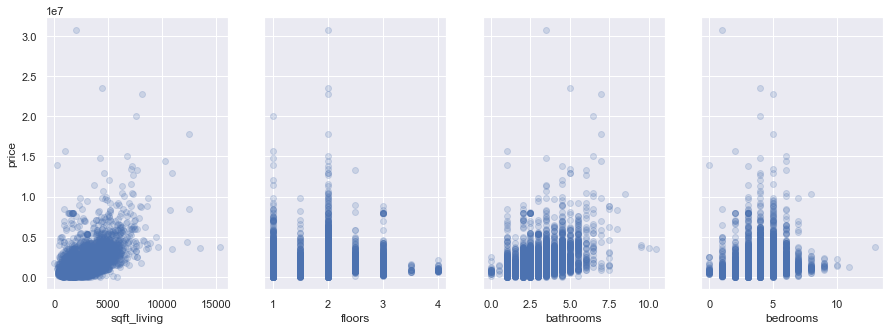

In [10]:
fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(kc_subset.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(kc_subset[col], kc_subset["price"], alpha=0.2)
    ax.set_xlabel(col)

We can see that living area square footage does seem to have a linear relationship. With number of floors and number of levels we can determine that these are catergorical discrete variables. 

In [11]:
kc_subset["floors"].value_counts()

1.0    13943
2.0    12245
1.5     2434
3.0     1221
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

In [12]:
kc_subset["bathrooms"].value_counts()

2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

In [13]:
kc_subset["bedrooms"].value_counts()

3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [14]:
# plotting number of bathrooms in both scatter plot and bar chart

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


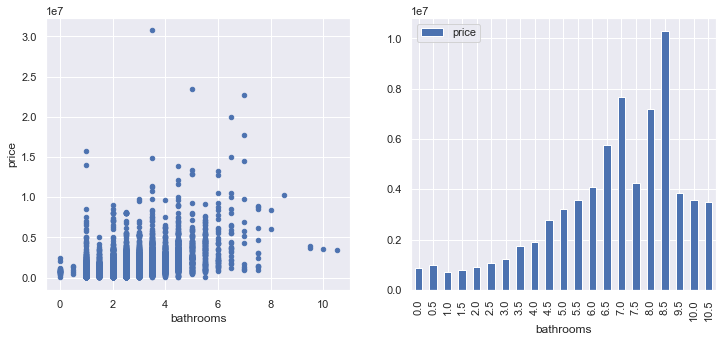

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

kc_subset.plot.scatter(x="bathrooms", y="price", ax=ax1)
kc_subset.groupby("bathrooms").mean().plot.bar(y="price", ax=ax2);

In [16]:
#Correlation of subset
kc_subset.corr()["price"]

sqft_living    0.608586
floors         0.180555
bathrooms      0.480284
bedrooms       0.288992
price          1.000000
Name: price, dtype: float64

In [17]:
y = kc_subset["price"]
# sqft_living had the highest correlation
X_baseline = kc_subset[["sqft_living"]]

In [18]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:25:26   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      

Baseline model regarding sqft_living (living area square foot) and price was statistically significant overall showing 37% of variance in sale price. 
However both our intercept and our coefficient for sqft_living were statistically significant.

In [19]:
kc_house_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


In [20]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  
 18  sqft_p

In [21]:
kc_house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326078
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [22]:
# looking at waterfront and price 
# Waterfront is a categorical, yes/ no 

waterfront_df = kc_house_df[["waterfront"]].copy()
waterfront_df.sample(10, random_state=1)

,waterfront
1254,NO
88,NO
21708,NO
4394,NO
2108,NO
11729,NO
29405,NO
12050,NO
7976,NO
11546,NO


In [23]:
waterfront_df["waterfront_yes/no"] = waterfront_df["waterfront"] == 1
waterfront_df.sample(10, random_state=1)



,waterfront,waterfront_yes/no
1254,NO,False
88,NO,False
21708,NO,False
4394,NO,False
2108,NO,False
11729,NO,False
29405,NO,False
12050,NO,False
7976,NO,False
11546,NO,False


In [24]:
waterfront_df["waterfront_yes/no"] = (waterfront_df["waterfront"] == 1).apply(int)
waterfront_df.sample(10, random_state=1)

,waterfront,waterfront_yes/no
1254,NO,0
88,NO,0
21708,NO,0
4394,NO,0
2108,NO,0
11729,NO,0
29405,NO,0
12050,NO,0
7976,NO,0
11546,NO,0


## Modeling 

## Regression Results 

## Conclusions/Recommendations 

## Limitations 